The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [46]:
data=pd.read_csv('online_shoppers_intention.csv')
data.head(5)
dataN=pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.shape

(12330, 18)

In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
data.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Administrative :27
The number of values for feature Administrative_Duration :3335
The number of values for feature Informational :17
The number of values for feature Informational_Duration :1258
The number of values for feature ProductRelated :311
The number of values for feature ProductRelated_Duration :9551
The number of values for feature BounceRates :1872
The number of values for feature ExitRates :4777
The number of values for feature PageValues :2704
The number of values for feature SpecialDay :6 -- [0.  0.2 0.4 0.6 0.8 1. ]
The number of values for feature Month :10
The number of values for feature OperatingSystems :8 -- [1 2 3 4 5 6 7 8]
The number of values for feature Browser :13
The number of values for feature Region :9 -- [1 2 3 4 5 6 7 8 9]
The number of values for feature TrafficType :20
The number of values for feature VisitorType :3 -- ['New_Visitor' 'Other' 'Returning_Visitor']
The number of values for feature Weekend :2 -- [False  Tru

In [8]:
nominalColumns=['Month','VisitorType','Weekend','Revenue','Region','TrafficType','Region','Browser','OperatingSystems','SpecialDay']

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


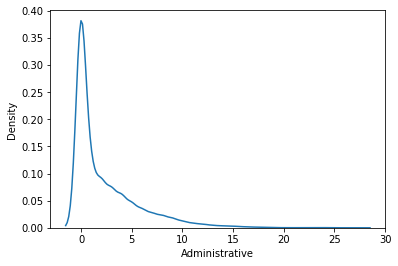

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


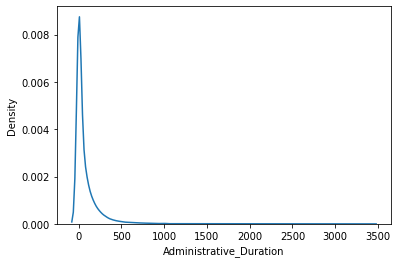

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


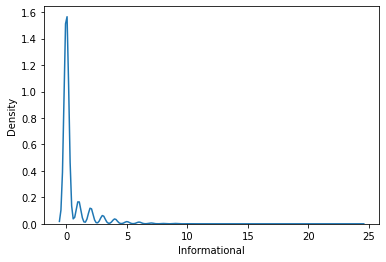

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


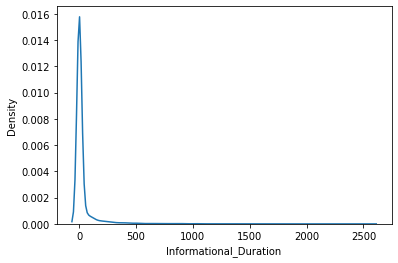

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


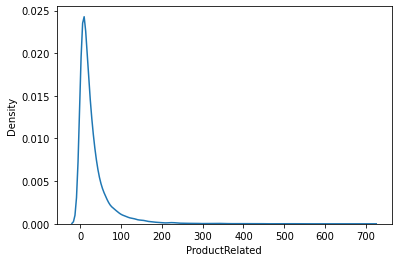

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


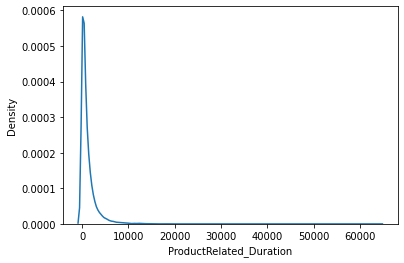

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


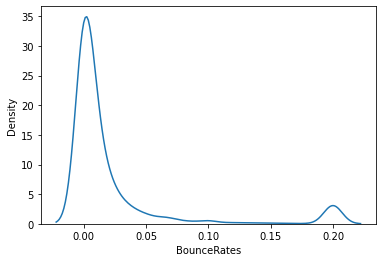

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


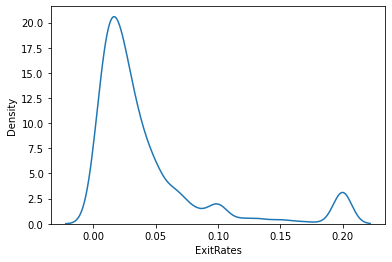

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


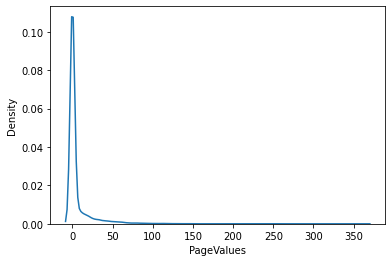

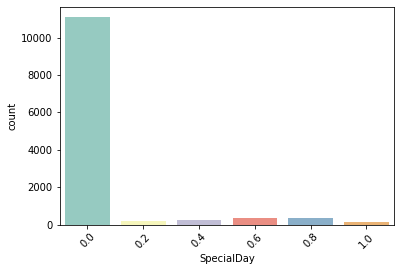

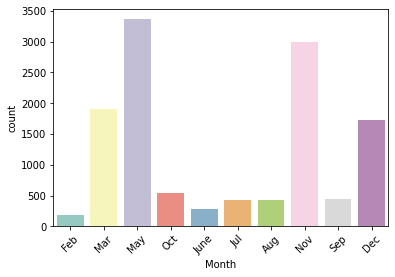

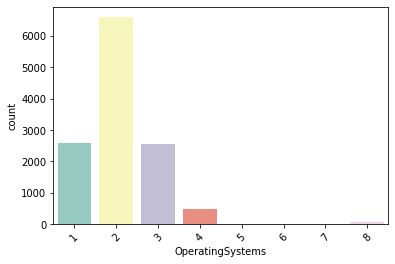

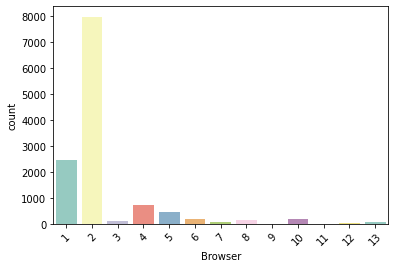

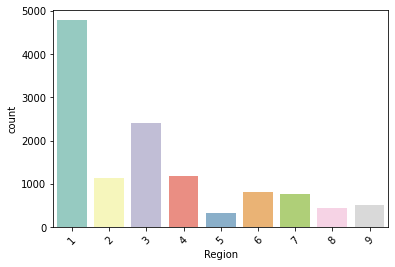

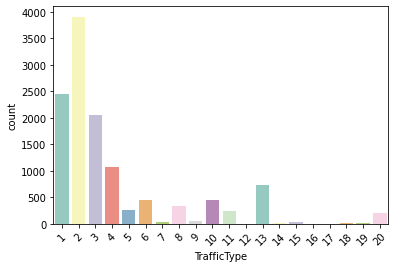

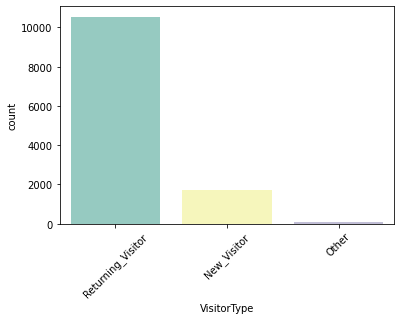

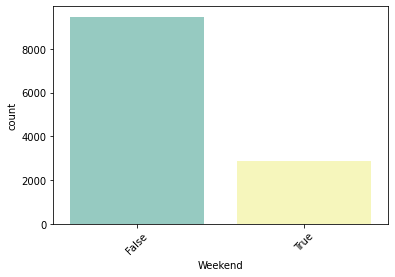

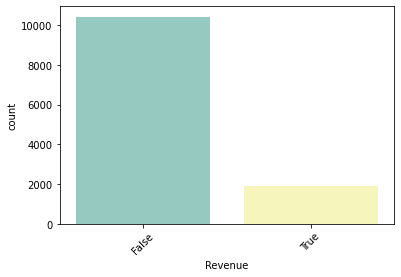

In [9]:
def showData(data):
    for col in data:
        if(col in nominalColumns):
            sea.countplot(x=col, data=data,palette='Set3')
            plt.xticks(rotation=45)
        else:
            ax=sea.distplot(data[[col]],hist=False)
            ax.set(xlabel=col)
        plt.show()
        
showData(data)

In [10]:
data.count()

Administrative             12330
Administrative_Duration    12330
Informational              12330
Informational_Duration     12330
ProductRelated             12330
ProductRelated_Duration    12330
BounceRates                12330
ExitRates                  12330
PageValues                 12330
SpecialDay                 12330
Month                      12330
OperatingSystems           12330
Browser                    12330
Region                     12330
TrafficType                12330
VisitorType                12330
Weekend                    12330
Revenue                    12330
dtype: int64

In [11]:
dataNotNan=data.dropna(axis=0)
dataNotNan.shape

(12330, 18)

In [12]:
data.drop_duplicates().shape

(12205, 18)

In [13]:
def indicies_of_outliers(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    print( ( x > upper_bound) | (x < lower_bound))


#indicies_of_outliers(data)

In [14]:
def removeOutliers(data):
    for ind,row in data.iterrows():
        for col in data:
            if(col not  in nominalColumns):
                Q1 = data[col].quantile(0.25)
                Q3 = data[col].quantile(0.75)
                IQR = Q3 - Q1
                if((row[col]< (Q1 - 1.5 * IQR))|(row[col] > (Q3 + 1.5 * IQR))):
                    data=data.drop([ind])
                    break


    return data
#dataWoOutliers=removeOutliers(data)
#dataWoOutliers

In [15]:
def nominalToNumeric(data):
    le = LabelEncoder()
    for col in nominalColumns:
        le.fit(data[col])
        data[col]=le.transform(data[col])
    return data

In [16]:
def MinMaxScale(data):
    for col in data:
        scale=MinMaxScaler(feature_range=(-1, 1))
        data = pd.DataFrame(scale.fit_transform(data.values), columns=data.columns, index=data.index)
    return data

def StandardScale(data):
    scale=StandardScaler()
    datapom=pd.DataFrame()
    datapom = pd.DataFrame(scale.fit_transform(data.values), columns=data.columns, index=data.index)
    
    return datapom

In [17]:
data=nominalToNumeric(data)

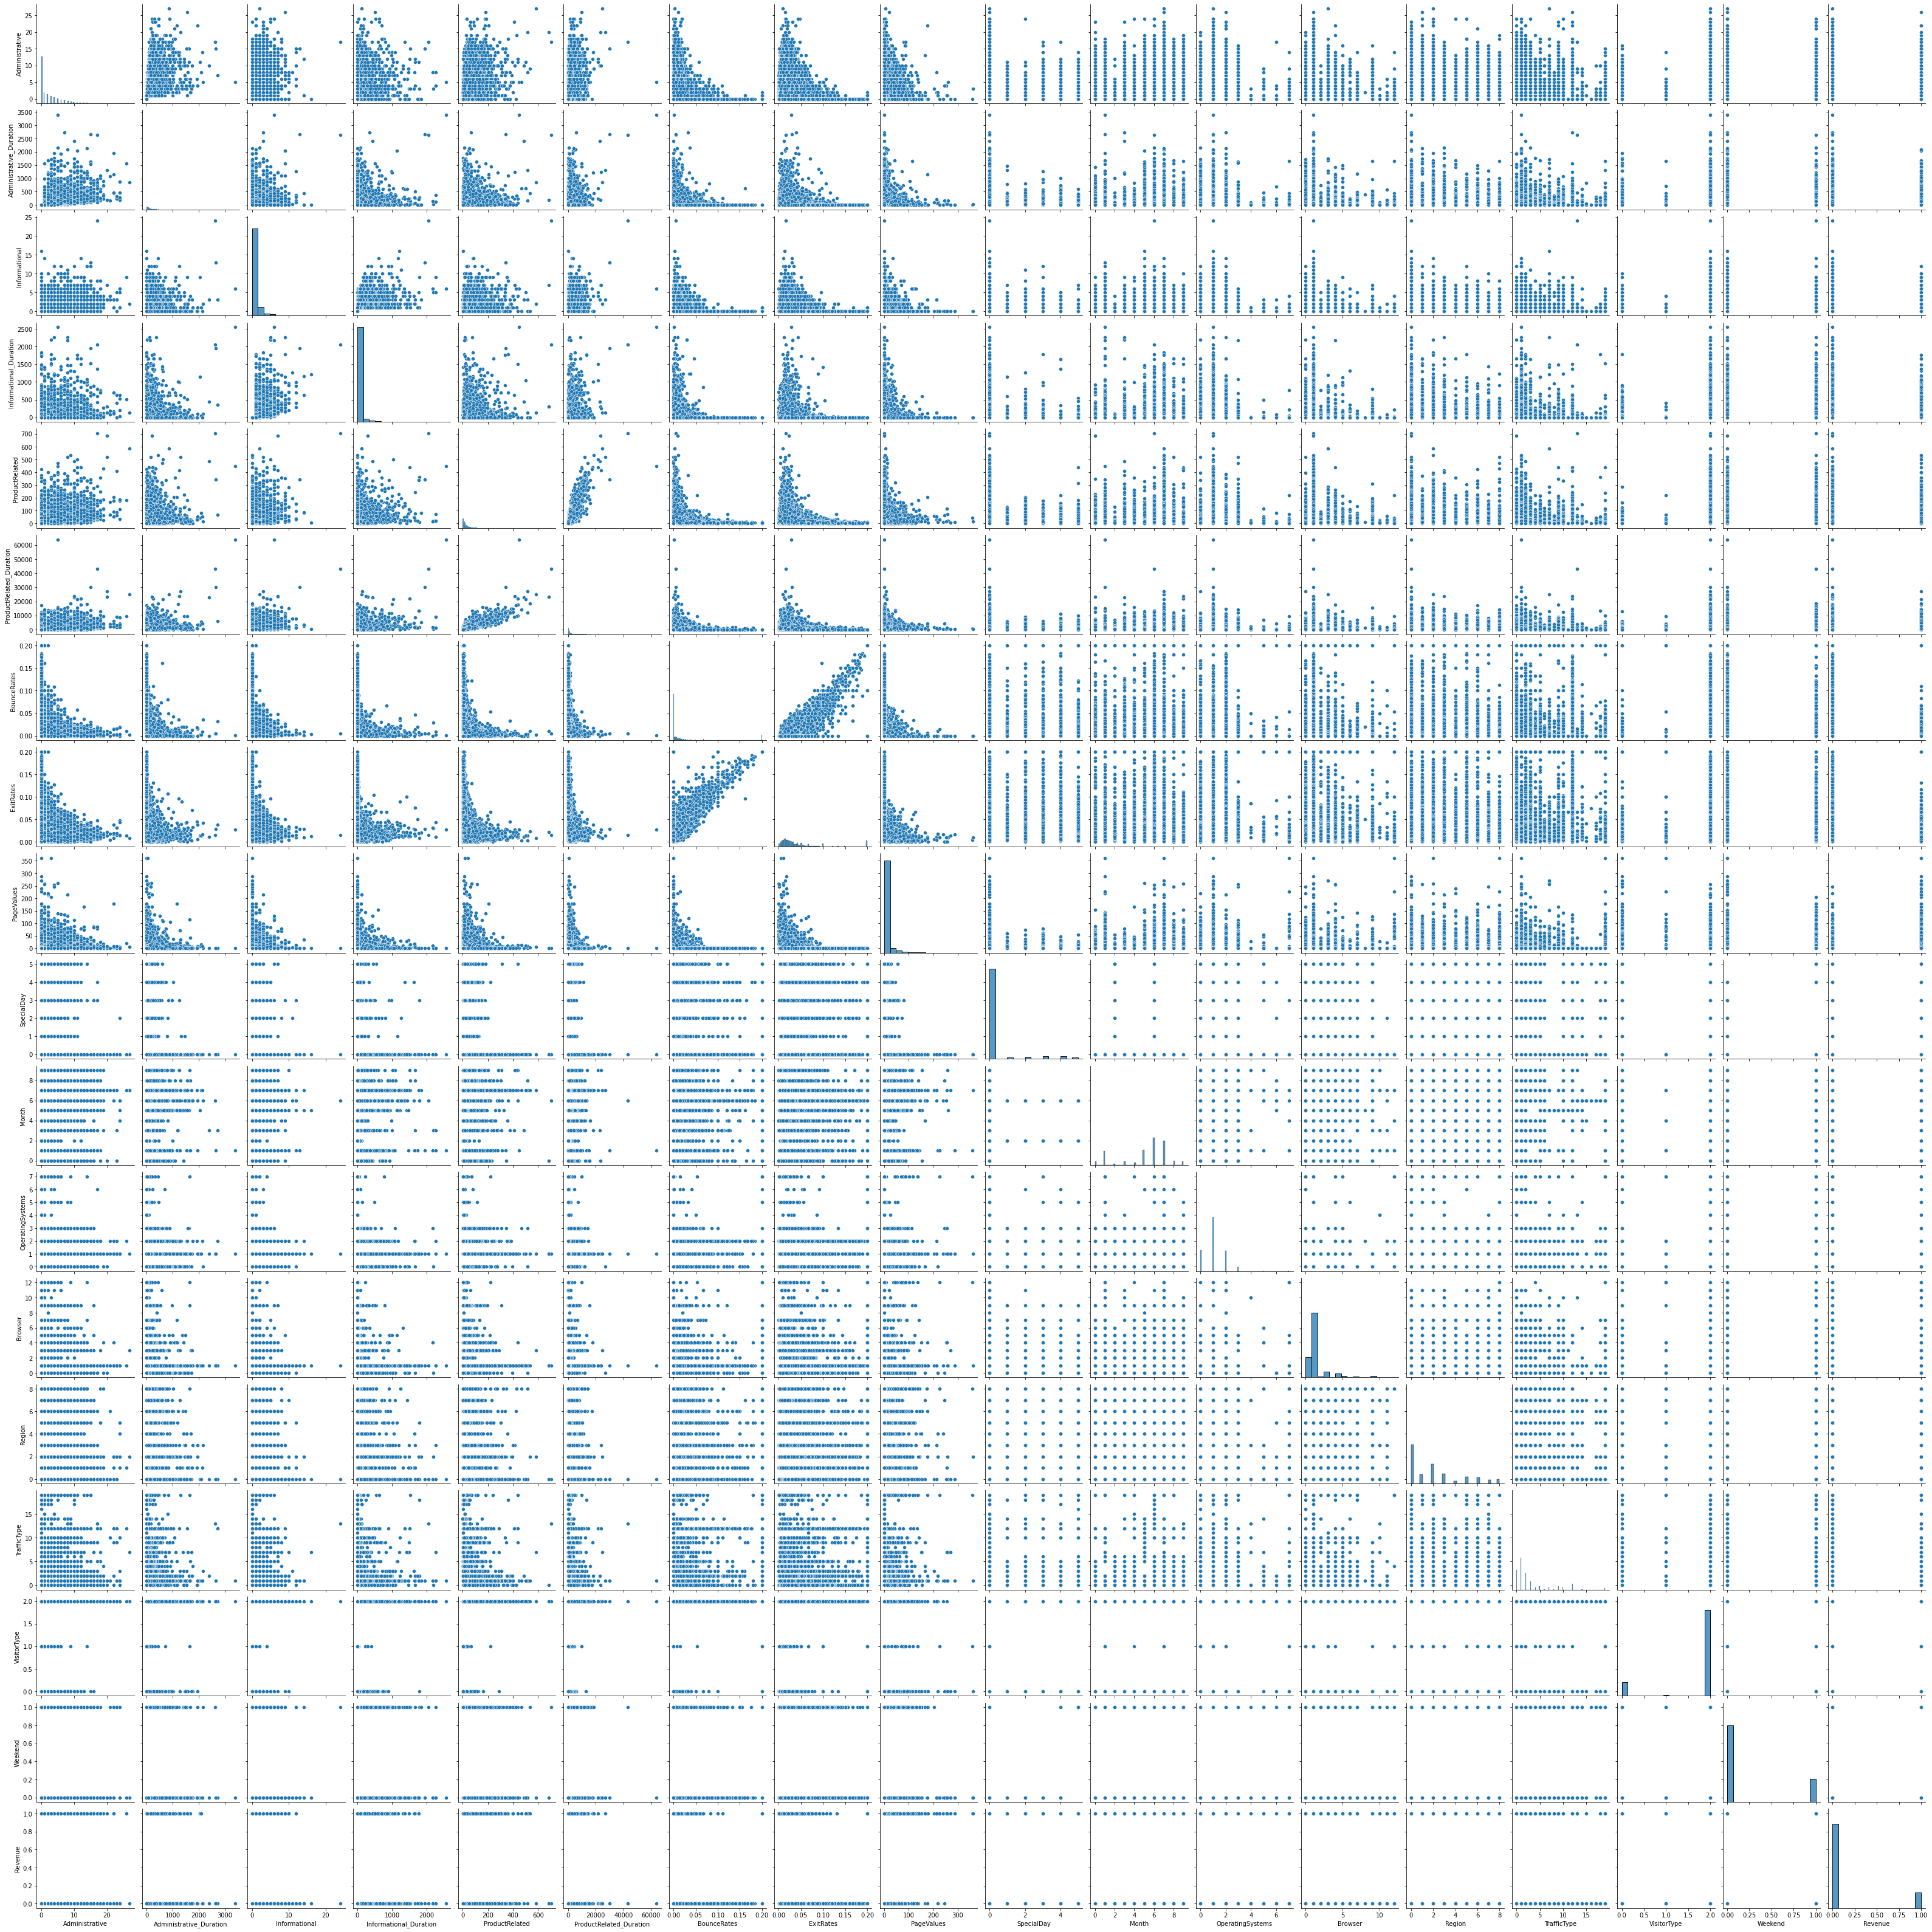

In [18]:
sea.pairplot(data)

## KMeans

Odredjujemo k centara i sve tacke se dodaju odredjenom klasteru na osnovu blizine centru na osnovu Euklidske distance. Zatim se ponovo izracunavaju centri, sve dok se u dve iteracije ne promene klasteri. Treba isprobavati da vidimo koji je najbolji broj k

[1 1 1 ... 1 1 1]
197751.89904879095
(12330,)


<AxesSubplot:xlabel='VisitorType', ylabel='Revenue'>

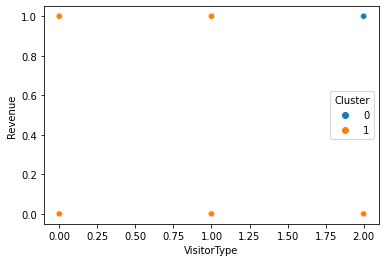

In [19]:
dataScaled=StandardScale(data)
km=KMeans(n_clusters=2,random_state=42)
km.fit(dataScaled)
km.predict(dataScaled)
labels=km.labels_
print(km.labels_)

print(km.inertia_)

print(km.labels_.shape)
data['Cluster']=labels
dataScaled['Cluster']=labels



sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

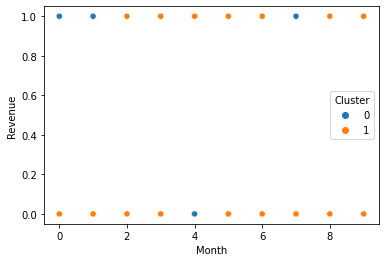

In [20]:
sea.scatterplot(y=data['Revenue'],x=data['Month'],hue='Cluster',data=data)

<AxesSubplot:xlabel='ProductRelated', ylabel='Revenue'>

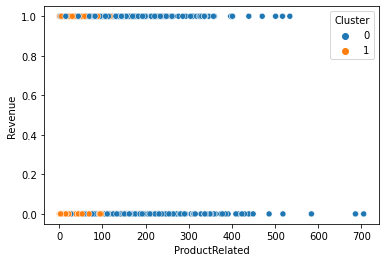

In [21]:

sea.scatterplot(y=data['Revenue'],x=data['ProductRelated'],hue='Cluster',data=data)

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Revenue'>

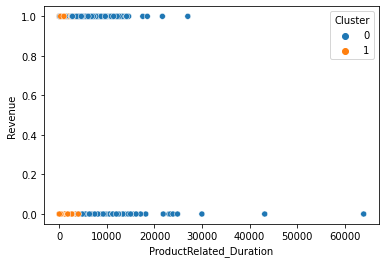

In [22]:

sea.scatterplot(y=data['Revenue'],x=data['ProductRelated_Duration'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Informational', ylabel='Revenue'>

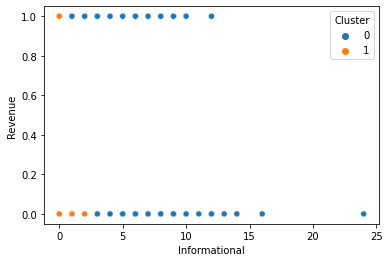

In [23]:

  sea.scatterplot(y=data['Revenue'],x=data['Informational'],hue='Cluster',data=data)  

<AxesSubplot:xlabel='PageValues', ylabel='Revenue'>

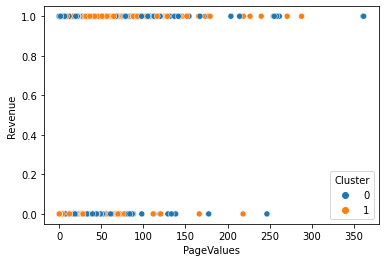

In [24]:

sea.scatterplot(y=data['Revenue'],x=data['PageValues'],hue='Cluster',data=data)  

<AxesSubplot:xlabel='Browser', ylabel='Revenue'>

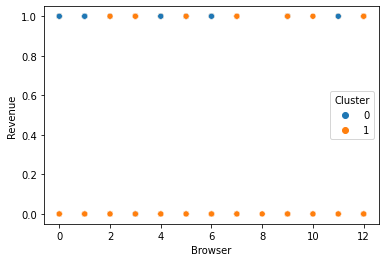

In [25]:

sea.scatterplot(y=data['Revenue'],x=data['Browser'],hue='Cluster',data=data)  

Inertia

In [26]:
no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(dataScaled)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 197751.8703731414
The innertia for : 3 Clusters is: 178134.7034236019
The innertia for : 4 Clusters is: 164795.38460027476
The innertia for : 5 Clusters is: 155323.77856869742
The innertia for : 6 Clusters is: 148559.81229278573
The innertia for : 7 Clusters is: 139622.47502151746
The innertia for : 8 Clusters is: 133402.28300662182
The innertia for : 9 Clusters is: 128129.64833241882
The innertia for : 10 Clusters is: 123132.60057260556
The innertia for : 11 Clusters is: 119116.2976978978
The innertia for : 12 Clusters is: 114538.57193401243
The innertia for : 13 Clusters is: 111701.14796838512
The innertia for : 14 Clusters is: 108262.97399112499
The innertia for : 15 Clusters is: 105656.25735172127
The innertia for : 16 Clusters is: 103367.77574507792
The innertia for : 17 Clusters is: 100399.91694763892
The innertia for : 18 Clusters is: 97627.90674826929
The innertia for : 19 Clusters is: 97024.60309655569


Text(0.5, 1.0, 'Inertia Plot per k')

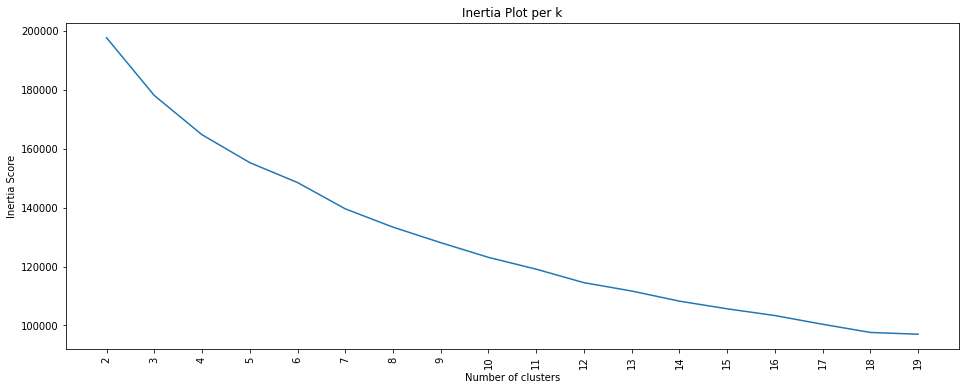

In [27]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [28]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(dataScaled)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(dataScaled)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2
0,2101,1055,9174


<AxesSubplot:xlabel='Cluster', ylabel='value'>

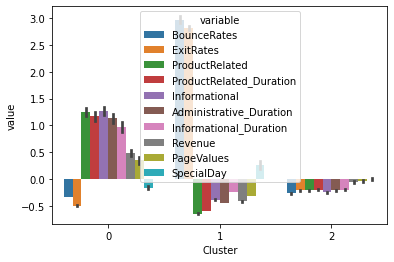

In [29]:

data['Cluster']=kmeans.labels_
dataScaled['Cluster']=kmeans.labels_



#sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)
df_mean = (dataScaled.loc[dataScaled.Cluster!=-1, :]
                    .groupby('Cluster').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['Cluster']
tidy = dataScaled[selected_columns].melt(id_vars='Cluster')
sea.barplot(x='Cluster', y='value', hue='variable', data=tidy)

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

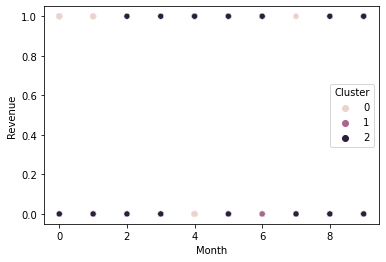

In [30]:
sea.scatterplot(y=data['Revenue'],x=data['Month'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Month', ylabel='VisitorType'>

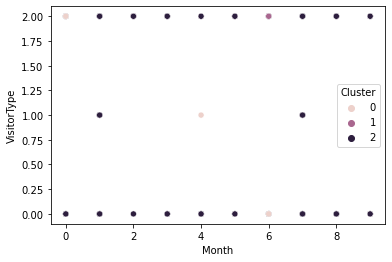

In [31]:
sea.scatterplot(y=data['VisitorType'],x=data['Month'],hue='Cluster',data=data)

<AxesSubplot:xlabel='ProductRelated', ylabel='VisitorType'>

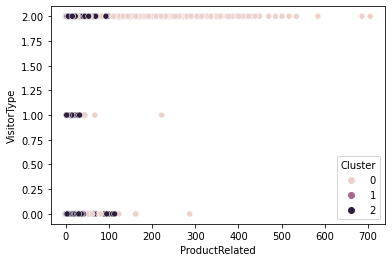

In [32]:
sea.scatterplot(y=data['VisitorType'],x=data['ProductRelated'],hue='Cluster',data=data)

In [33]:
np.set_printoptions(threshold=np.inf)

## PCA Analiza
-Zelimo da nadjemo Principal components, najbitnije karakteristike, one koje najvse znace za nas dataset.
-Prva najbitnija komponenta je ona koja ima najvise znacaja koja najvise oznacava
95% vrijanse dataseta odredjuje atribute trebamo zadrzati

### PCA Analiza 2 elementa

Explained variance ratio (first two components): [0.19832367 0.10733762]


<Figure size 432x288 with 0 Axes>

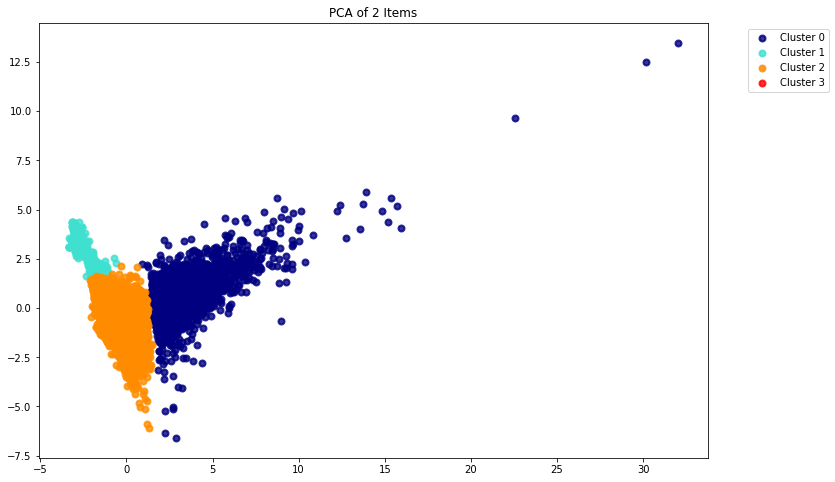

In [34]:

X = dataScaled
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()


### PCA Analiza 3 elementa

Explained variance ratio (first two components): [0.19832393 0.10733888 0.07741105]


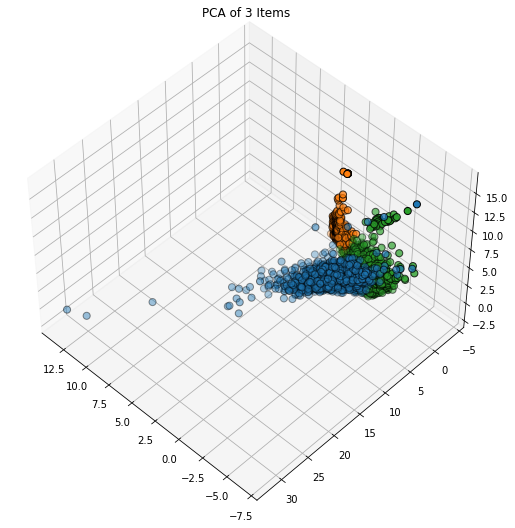

In [35]:
X = dataScaled
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=3, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data

colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 3



fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    ax.scatter(X_r[y_num == i, 1], X_r[y_num == i, 0], X_r[y_num == i, 2],
           edgecolor="k", s=50)
plt.title('PCA of 3 Items')
plt.show()

### Nalazenje atributa

Total Variance in our dataset is:  18.586879186920235
The 95% variance we want to have is:  17.657535227574222

Variance explain with 6 n_compononets:  10.699786175159964
Variance explain with 8 n_compononets:  12.698547121245657
Variance explain with 10 n_compononets:  14.522317540915445
Variance explain with 11 n_compononets:  15.363634663050329
Variance explain with 12 n_compononets:  16.171745725285636
Variance explain with 13 n_compononets:  16.92226513075836
Variance explain with 14 n_compononets:  17.41659203373453
Variance explain with 15 n_compononets:  17.852613520230296


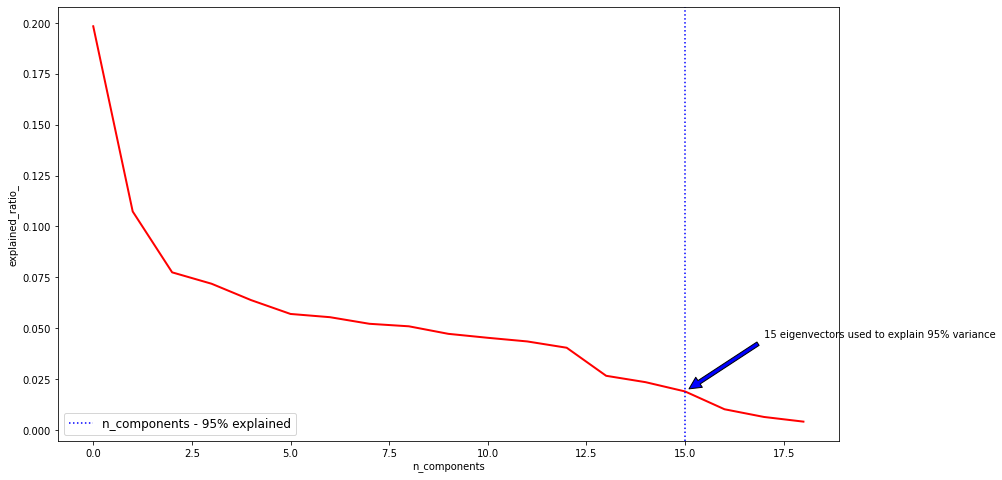

In [36]:

# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 6 n_compononets: ", sum(a["Explained Variance"][0:6]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 11 n_compononets: ", sum(a["Explained Variance"][0:11]))
print("Variance explain with 12 n_compononets: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 13 n_compononets: ", sum(a["Explained Variance"][0:13]))
print("Variance explain with 14 n_compononets: ", sum(a["Explained Variance"][0:14]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(15,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('15 eigenvectors used to explain 95% variance', xy=(15, pca.explained_variance_ratio_[15]), 
             xytext=(17, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

### Ponovo pustamo KMeans

The innertia for : 2 Clusters is: 190197.2705234207
The innertia for : 3 Clusters is: 169648.53470550358
kmeans: 0.24626301229596537
The innertia for : 4 Clusters is: 156979.66994116257
The innertia for : 5 Clusters is: 147728.07420387483
The innertia for : 6 Clusters is: 140815.86517203573
The innertia for : 7 Clusters is: 133383.08792399123
The innertia for : 8 Clusters is: 127132.1832112775
The innertia for : 9 Clusters is: 121877.24024954713
The innertia for : 10 Clusters is: 115926.60446378378
The innertia for : 11 Clusters is: 111343.45077274869
The innertia for : 12 Clusters is: 107871.81698375521
The innertia for : 13 Clusters is: 104160.82593359903
The innertia for : 14 Clusters is: 100781.46761161284
The innertia for : 15 Clusters is: 98034.56406536764
The innertia for : 16 Clusters is: 95458.30334382015
The innertia for : 17 Clusters is: 93309.04745675411
The innertia for : 18 Clusters is: 92287.36998449237
The innertia for : 19 Clusters is: 89149.8369774898


Text(0.5, 1.0, 'Inertia Plot per k')

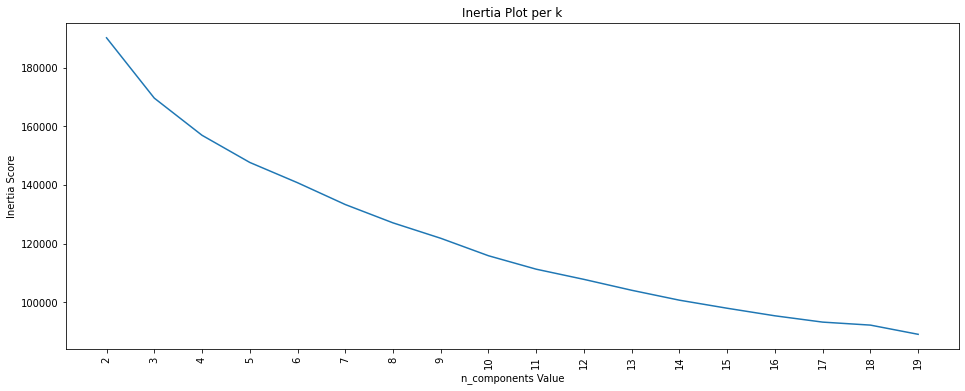

In [37]:
pca = PCA(n_components=15, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)
    if(f==3):
        print('kmeans: {}'.format(silhouette_score(X_r, kmeans.labels_, 
                                           metric='euclidean')))

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")


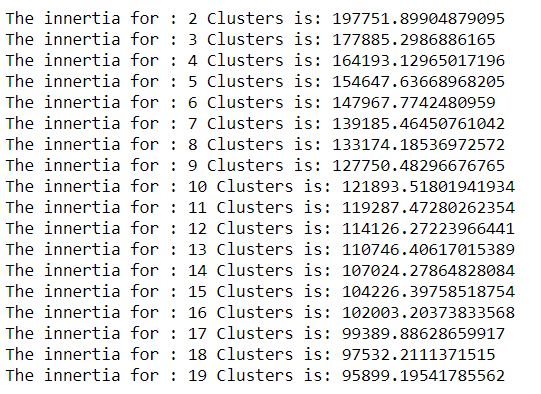

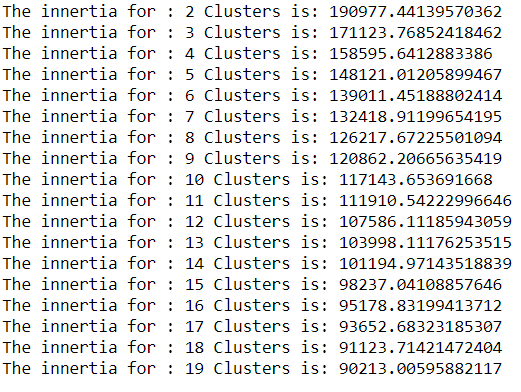

In [38]:
km=KMeans(n_clusters=3,random_state=42)
km.fit(dataScaled)
# Print results
print('kmeans: {}'.format(silhouette_score(dataScaled, km.labels_, 
                                           metric='euclidean')))

kmeans: 0.24264388423707586


## Hierarchical clustering
Svaki pripada svom klasteru na pocetku te imamo N klastera na pocetku svaki sa po jednom, zatim se nalaze najslicniji(najblizi) i oni se spajaju, i postaju novi klaster sve dok svi ne pripadaju svi jednom klasteru

<AxesSubplot:xlabel='VisitorType', ylabel='Revenue'>

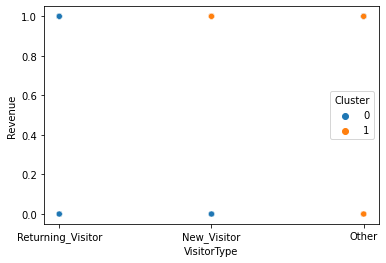

In [53]:

#dendrogram = sch.dendrogram(sch.linkage(dataScaled,method='ward'))
hc=AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
hc.fit(dataScaled)

labels=hc.labels_

data['Cluster']=labels
dataScaled['Cluster']=labels



sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

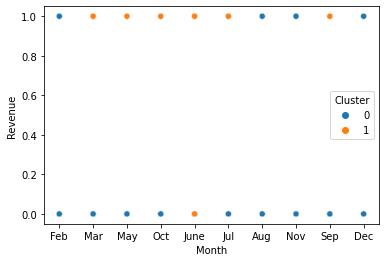

In [54]:
sea.scatterplot(y=data['Revenue'],x=data['Month'],hue='Cluster',data=data)

<AxesSubplot:xlabel='ProductRelated', ylabel='Revenue'>

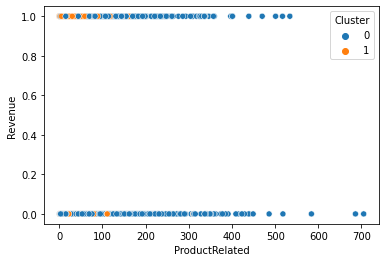

In [55]:
sea.scatterplot(y=data['Revenue'],x=data['ProductRelated'],hue='Cluster',data=data)

In [58]:
no_of_clusters = range(2,25) #[2,3,4,5,6,7,8,9]
ss = []


for f in no_of_clusters:
    hc = AgglomerativeClustering(n_clusters=f, affinity = 'euclidean', linkage = 'ward')
    hc = hc.fit(dataScaled)
    u = silhouette_score(dataScaled, hc.labels_)
    ss.append(u)
    print("The siluete score for :", f, "Clusters is:", u)

The siluete score for : 2 Clusters is: 0.1789744683665435
The siluete score for : 3 Clusters is: 0.1761804271104897
The siluete score for : 4 Clusters is: 0.16954050007914961
The siluete score for : 5 Clusters is: 0.17338741186516032
The siluete score for : 6 Clusters is: 0.14371225456747358
The siluete score for : 7 Clusters is: 0.15335270721995098
The siluete score for : 8 Clusters is: 0.15954758457423357
The siluete score for : 9 Clusters is: 0.12475434534055306
The siluete score for : 10 Clusters is: 0.1304012533358259
The siluete score for : 11 Clusters is: 0.13032051132351002
The siluete score for : 12 Clusters is: 0.13403026152516465
The siluete score for : 13 Clusters is: 0.13853024766471045
The siluete score for : 14 Clusters is: 0.12085720036169026
The siluete score for : 15 Clusters is: 0.1253159823944919
The siluete score for : 16 Clusters is: 0.1258787111950554
The siluete score for : 17 Clusters is: 0.13125611528739956
The siluete score for : 18 Clusters is: 0.11718887037

Text(0.5, 1.0, 'Silouette Score Plot per k')

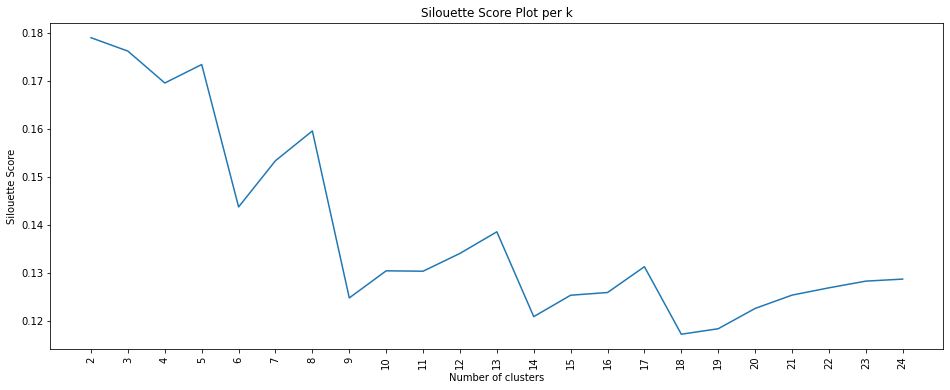

In [59]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, ss)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Silouette Score')
plt.title("Silouette Score Plot per k")

<AxesSubplot:xlabel='Cluster', ylabel='value'>

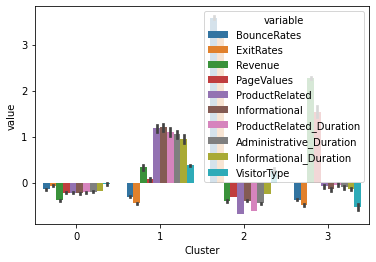

In [60]:
hc=AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
hc.fit(dataScaled)

labels=hc.labels_

data['Cluster']=labels
dataScaled['Cluster']=labels



#sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)
df_mean = (dataScaled.loc[dataScaled.Cluster!=-1, :]
                    .groupby('Cluster').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['Cluster']
tidy = dataScaled[selected_columns].melt(id_vars='Cluster')
sea.barplot(x='Cluster', y='value', hue='variable', data=tidy)

### DBSCAN

<AxesSubplot:xlabel='VisitorType', ylabel='Revenue'>

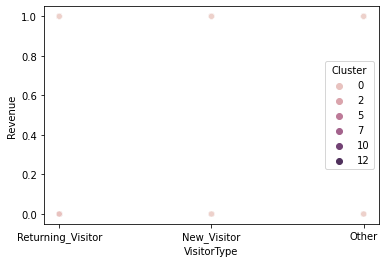

In [63]:
db=DBSCAN(min_samples=19,eps=1.1,n_jobs=-1)
db.fit(dataScaled)

labels=db.labels_

data['Cluster']=labels
dataScaled['Cluster']=labels



sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

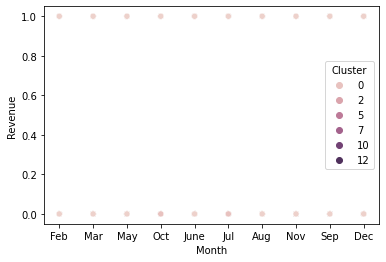

In [64]:
sea.scatterplot(y=data['Revenue'],x=data['Month'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

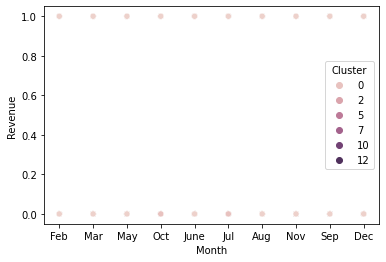

In [65]:
sea.scatterplot(y=data['Revenue'],x=data['Month'],hue='Cluster',data=data)

<AxesSubplot:xlabel='ProductRelated', ylabel='Revenue'>

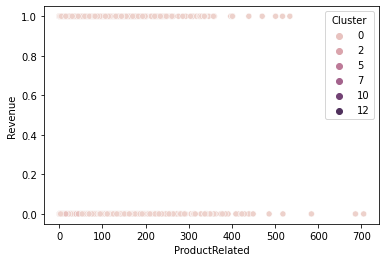

In [66]:
sea.scatterplot(y=data['Revenue'],x=data['ProductRelated'],hue='Cluster',data=data)

In [ ]:
no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
ss = []


for f in no_of_clusters:
    db=DBSCAN(min_samples=f,eps=1.1,n_jobs=-1)
    db.fit(dataScaled)
    u = silhouette_score(dataScaled, db.labels_)
    ss.append(u)
    print("The siluete score for :", f, "Clusters is:", u)

The siluete score for : 2 Clusters is: -0.2977720909636171
The siluete score for : 3 Clusters is: -0.28345735029951274
The siluete score for : 4 Clusters is: -0.2718732378333383
The siluete score for : 5 Clusters is: -0.24335293965603996
The siluete score for : 6 Clusters is: -0.2309327718943356
The siluete score for : 7 Clusters is: -0.24049664713350058
The siluete score for : 8 Clusters is: -0.21754910555688528
The siluete score for : 9 Clusters is: -0.21777817920879208
The siluete score for : 10 Clusters is: -0.21857019955774448
The siluete score for : 11 Clusters is: -0.22597227385181598
The siluete score for : 12 Clusters is: -0.22911838094800596
The siluete score for : 13 Clusters is: -0.23162820724445887
The siluete score for : 14 Clusters is: -0.22950614468722189
The siluete score for : 15 Clusters is: -0.21767434150336074


<AxesSubplot:xlabel='Cluster', ylabel='value'>

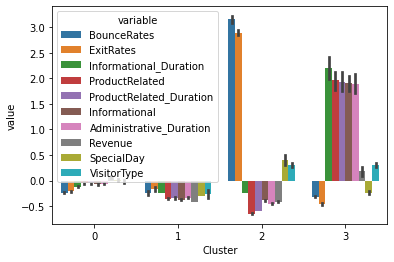

In [68]:
hc=AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
hc.fit(dataScaled)

labels=hc.labels_

data['Cluster']=labels
dataScaled['Cluster']=labels



#sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)
df_mean = (dataScaled.loc[dataScaled.Cluster!=-1, :]
                    .groupby('Cluster').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['Cluster']
tidy = dataScaled[selected_columns].melt(id_vars='Cluster')
sea.barplot(x='Cluster', y='value', hue='variable', data=tidy)